# Imports

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_rows', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Settings

In [2]:
size = 256
channels = 3
classes = 3

In [5]:
train_df = spark.read.load("data_new/train_256.parquet")
val_df = spark.read.load("data_new/val_256.parquet")

In [6]:
# Explore class distributions.
for df in [train_df, val_df]:
  df.select("tumor_score").groupBy("tumor_score").count().show()

+-----------+------+
|tumor_score| count|
+-----------+------+
|          1|726548|
|          3|645326|
|          2|429961|
+-----------+------+

+-----------+------+
|tumor_score| count|
+-----------+------+
|          1|217467|
|          3|151671|
|          2|129045|
+-----------+------+



In [9]:
# Explore slide distributions.
for df in [train_df, val_df]:
#   df.select("slide_num").groupBy("slide_num").count().show()
  print(df.select("slide_num", "tumor_score").groupBy("slide_num").count().orderBy('count').toPandas())

     slide_num  count
0          436      1
1          116      1
2          468      2
3           38      3
4          195      4
5          173      5
6           13      7
7          481      8
8           83      9
9          349     11
10         490     15
11         292     17
12         281     22
13         387     26
14         326     32
15         286     32
16          88     39
17         477     48
18         205     57
19         135     58
20         127     58
21          16     61
22         245     66
23           5     81
24         306     83
25         284     91
26         263    100
27          15    120
28         345    124
29         380    128
30          24    137
31         382    150
32           1    154
33         421    164
34         163    169
35         278    171
36         235    197
37         332    197
38         343    207
39          43    237
40         249    246
41         113    256
42         496    262
43         482    264
44        

In [10]:
data = train_df.select("slide_num", "tumor_score").groupBy("slide_num").count().orderBy('count').toPandas()
data = data.set_index("slide_num")
data

,count
slide_num,
116,1
436,1
468,2
38,3
195,4
173,5
13,7
481,8
83,9


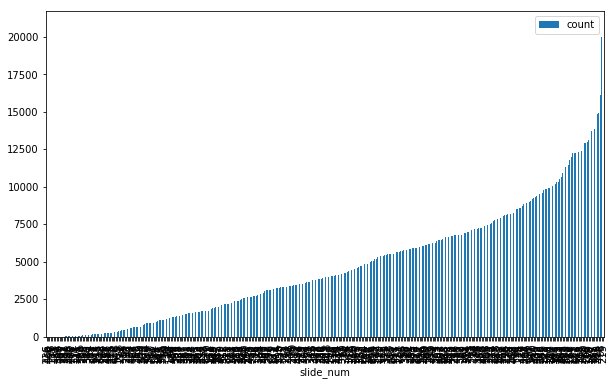

In [11]:
# data.plot(x='slide_num', y='count', kind='bar')
data.plot(kind='bar')

In [12]:
# Explore sample image
ex = train_df.filter(train_df['slide_num'] == 436).first()

In [ ]:
plt.imshow(ex.sample.reshape(channels, size, size).transpose(1,2,0).astype(np.uint8))

In [ ]:
tc = train_df.count()
vc = val_df.count()
print(tc, vc)  # updated norm vs: 1801835 498183; original: 3560187 910918